In [15]:
import numpy as np

In [16]:
def par_fun(tau_on=1., tau_off=0.2):
    return tau_on, tau_off


def ode_fun(t, var, pars):
    tau_on, tau_off, u = pars

    if u > var:
        out = (u - var) / tau_on
    else:
        out =  (u - var) / tau_off

    return out

In [42]:
from scipy.integrate import solve_ivp

u_arr = [1, 0, 1, 0, 1, 0]

t_final = (len(u_arr) - 1) * 10
t_arr = np.linspace(0, t_final, len(u_arr))
tau_on, tau_off = par_fun(tau_on=1, tau_off=0.5)

# u_arr = [0, 1]
# t_arr = [0, 5]

out = []
out_t = []
initial = [1]

for i in range(len(t_arr) - 1):
    # print(i)

    t_span = [t_arr[i], t_arr[i+1]]
    u_par = u_arr[i]
    pars = tau_on, tau_off, u_par

    # print(pars)
    # print(initial)

    sol = solve_ivp(ode_fun, t_span, initial, args=(pars,), 
                        rtol=1e-12, atol=1e-15, 
                        method='BDF'
                    )
    
    initial = sol.y[:,-1]

    out.append(sol.y[0])
    out_t.append(sol.t)

out = np.concatenate(out)
out_t = np.concatenate(out_t)

In [43]:
print(out.shape)

(3378,)


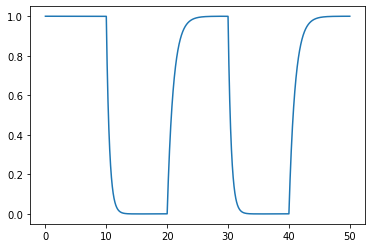

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(out_t, out)